tensor([ 4.9913,  5.1530,  8.1848, -7.3679,  3.4082, -4.5682,  4.6584, -1.3924,
        -0.2751, -1.3601, -0.6559])
tensor([-3.7381, -3.9007, -1.1185, -1.0715, -2.0962,  0.8260, -0.7538, -0.1156,
        -1.2184, -0.0575, -1.5553])
tensor([ 0.7927,  0.6957,  1.3775, -2.0660, -0.4682, -0.6265,  0.6842, -0.8401,
        -0.2271, -0.8261, -0.4641])
tensor([-0.6408, -0.6869, -0.0529, -0.9186, -1.1088,  0.1950, -0.1488, -0.5136,
        -0.3402, -0.5217, -0.5104])
tensor([ 0.0539,  0.0371,  0.3406, -0.9209, -0.7010, -0.0515,  0.0885, -0.5390,
        -0.1440, -0.5548, -0.2710])
tensor([-0.1718, -0.1722,  0.1142, -0.6172, -0.6803,  0.0657, -0.0361, -0.4204,
        -0.1260, -0.4364, -0.2242])
tensor([-0.0613, -0.0527,  0.1703, -0.5180, -0.5200,  0.0207,  0.0030, -0.3707,
        -0.0664, -0.3836, -0.1449])
tensor([-0.0931, -0.0797,  0.1289, -0.3913, -0.4391,  0.0348, -0.0159, -0.3088,
        -0.0409, -0.3174, -0.1054])
tensor([-0.0719, -0.0559,  0.1316, -0.3127, -0.3516,  0.0249, -0.0097, -

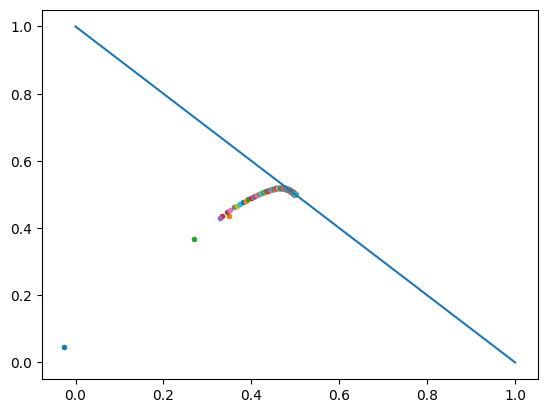

In [2]:
import torch
import numpy as np
from sympy import *
from matplotlib import pyplot as plt

# Introduce slack variables, so that all constraints become equalities
# Slack variables are basically non-negative variables that get added to the 
# inequality constraints, so that they become equalities
pars = torch.nn.Parameter(torch.randn(11))

opt = torch.optim.SGD(params=[pars], lr=0.1)

for epoch in range(1000):
    opt.zero_grad()
    loss = (pars[1]+pars[2]-pars[3]+pars[4])**2 + (pars[0]+pars[2]-pars[5]+pars[6])**2\
        + (pars[0]+pars[1]-1)**2 + (-pars[0]+pars[7])**2 + (pars[0]-1+pars[8])**2\
        + (-pars[1]+pars[9])**2 + (pars[1]-1+pars[10])**2 +\
        pars[3]**2 + pars[4]**2 + pars[5]**2 + pars[6]**2
        #pars[2]**2 + pars[3]**2 + pars[4]**2 + pars[5]**2
    loss.backward()
    print(pars.grad)
    opt.step()
    pq = [par.item() for par in pars[:2]]
    plt.plot(pq[0], pq[1], ".")

pars = pars.detach()
pars[7:].clamp_(0)
print(pars)

plt.plot(np.linspace(0,1), np.ones(50)-np.linspace(0,1))
plt.show()

In [1]:
pars = torch.nn.Parameter(torch.randn(7))

opt = torch.optim.SGD(params=[pars], lr=0.1)

for epoch in range(1000):
    opt.zero_grad()
    loss = (-pars[1]+pars[2]-pars[3]+pars[4])**2 + (-pars[0]+pars[2]-pars[5]+pars[6])**2\
        + (pars[0]+pars[1]-1)**2 + (-pars[0])**2 + (pars[0]-1)**2\
        + (-pars[1])**2 + (pars[1]-1)**2 \
        + pars[2]**2
    loss.backward()
    #print(pars.grad)
    opt.step()
    pq = [par.item() for par in pars[:2]]
    plt.plot(pq[0], pq[1], ".")

pars = pars.detach()
#pars[7:].clamp_(0)
print(pars)

plt.plot(np.linspace(0,1), np.ones(50)-np.linspace(0,1))
plt.show()

NameError: name 'torch' is not defined

tensor([0.0000, 0.7432], grad_fn=<SliceBackward0>)
tensor([0.0000, 0.7432], grad_fn=<ClampBackward1>)
tensor([0.0000, 0.7284], grad_fn=<SliceBackward0>)
tensor([0.0000, 0.7284], grad_fn=<ClampBackward1>)
tensor([0.0000, 0.7140], grad_fn=<SliceBackward0>)
tensor([0.0000, 0.7140], grad_fn=<ClampBackward1>)
tensor([0.0000, 0.6998], grad_fn=<SliceBackward0>)
tensor([0.0000, 0.6998], grad_fn=<ClampBackward1>)
tensor([0.0000, 0.6855], grad_fn=<SliceBackward0>)
tensor([0.0000, 0.6855], grad_fn=<ClampBackward1>)
tensor([0.0000, 0.6711], grad_fn=<SliceBackward0>)
tensor([0.0000, 0.6711], grad_fn=<ClampBackward1>)
tensor([0.0000, 0.6565], grad_fn=<SliceBackward0>)
tensor([0.0000, 0.6565], grad_fn=<ClampBackward1>)
tensor([0.0000, 0.6414], grad_fn=<SliceBackward0>)
tensor([0.0000, 0.6414], grad_fn=<ClampBackward1>)
tensor([0.0000, 0.6260], grad_fn=<SliceBackward0>)
tensor([0.0000, 0.6260], grad_fn=<ClampBackward1>)
tensor([0.0000, 0.6100], grad_fn=<SliceBackward0>)
tensor([0.0000, 0.6100], grad_f

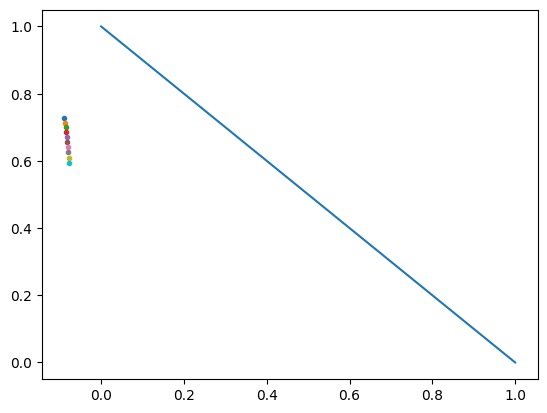

In [33]:

pars = torch.nn.Parameter(torch.randn(3))

opt = torch.optim.SGD(params=[pars], lr=0.1)

for epoch in range(10):
    opt.zero_grad()
    with torch.no_grad():
        pars[:2] = torch.clamp(pars[:2], min=0, max=1)
    loss = pars[0]*pars[1] - pars[2]*(pars[0]+pars[1]-1) + pars[2]**2
    loss.backward()
    print(pars[:2])
    print(torch.clamp(pars[:2],min=0,max=1))
    #print(pars.grad)
    opt.step()
    # pars[:2].clamp_(0,1)
    pq = [par.item() for par in pars[:2]]
    plt.plot(pq[0], pq[1], ".")

torch.clamp(pars[:2], min=0, max=1)
pars = pars.detach()
print(pars)

plt.plot(np.linspace(0,1), np.ones(50)-np.linspace(0,1))
plt.show()
